# REGRESSION ARABA FİYATLARINI TAHMİN ETME


## <fontsize=red>VERİYİ AL

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")




In [2]:
df=pd.read_excel("cars.xls")

# EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 804 entries, 0 to 803
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Price     804 non-null    float64
 1   Mileage   804 non-null    int64  
 2   Make      804 non-null    object 
 3   Model     804 non-null    object 
 4   Trim      804 non-null    object 
 5   Type      804 non-null    object 
 6   Cylinder  804 non-null    int64  
 7   Liter     804 non-null    float64
 8   Doors     804 non-null    int64  
 9   Cruise    804 non-null    int64  
 10  Sound     804 non-null    int64  
 11  Leather   804 non-null    int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 75.5+ KB


In [4]:
df.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


In [5]:
df.tail()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
799,16507.070267,16229,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,0,0
800,16175.957604,19095,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0
801,15731.132897,20484,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0
802,15118.893228,25979,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0
803,13585.636802,35662,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,0,0


In [6]:
df.sample(10)

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
383,24809.042324,16111,Chevrolet,Impala,SS Sedan 4D,Sedan,6,3.8,4,1,0,0
128,31181.715159,26222,Cadillac,Deville,Sedan 4D,Sedan,8,4.6,4,1,0,1
369,18083.396299,29420,Chevrolet,Impala,LS Sedan 4D,Sedan,6,3.8,4,1,1,1
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
224,11539.845650,22405,Chevrolet,Cavalier,Coupe 2D,Coupe,4,2.2,2,0,1,1
83,44130.617055,21341,Cadillac,CST-V,Sedan 4D,Sedan,8,5.7,4,1,0,1
627,15622.121098,23217,Pontiac,Vibe,Sportwagon 4D,Wagon,4,1.8,4,1,1,1
149,39072.392053,31587,Cadillac,STS-V8,Sedan 4D,Sedan,8,4.6,4,1,0,1
223,12469.527576,19712,Chevrolet,Cavalier,Coupe 2D,Coupe,4,2.2,2,0,1,1
467,20017.968430,22729,Chevrolet,Monte Carlo,LT Coupe 2D,Coupe,6,3.8,2,1,0,0


In [7]:
df.describe()

,Price,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather
count,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000
mean,21343.143767,19831.934080,5.268657,3.037313,3.527363,0.752488,0.679104,0.723881
std,9884.852801,8196.319707,1.387531,1.105562,0.850169,0.431836,0.467111,0.447355
min,8638.930895,266.000000,4.000000,1.600000,2.000000,0.000000,0.000000,0.000000
25%,14273.073870,14623.500000,4.000000,2.200000,4.000000,1.000000,0.000000,0.000000
50%,18024.995019,20913.500000,6.000000,2.800000,4.000000,1.000000,1.000000,1.000000
75%,26717.316636,25213.000000,6.000000,3.800000,4.000000,1.000000,1.000000,1.000000
max,70755.466717,50387.000000,8.000000,6.000000,4.000000,1.000000,1.000000,1.000000


In [8]:
df.corr()

,Price,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather
Price,1.000000,-0.143051,0.569086,0.558146,-0.138750,0.430851,-0.124348,0.157197
Mileage,-0.143051,1.000000,-0.029461,-0.018641,-0.016944,0.025037,-0.026146,0.001005
Cylinder,0.569086,-0.029461,1.000000,0.957897,0.002206,0.354285,-0.089704,0.075520
Liter,0.558146,-0.018641,0.957897,1.000000,-0.079259,0.377509,-0.065527,0.087332
Doors,-0.138750,-0.016944,0.002206,-0.079259,1.000000,-0.047674,-0.062530,-0.061969
Cruise,0.430851,0.025037,0.354285,0.377509,-0.047674,1.000000,-0.091730,-0.070573
Sound,-0.124348,-0.026146,-0.089704,-0.065527,-0.062530,-0.091730,1.000000,0.165444
Leather,0.157197,0.001005,0.075520,0.087332,-0.061969,-0.070573,0.165444,1.000000


In [9]:
abs(df.corr()["Price"]).sort_values(ascending=False)

Price       1.000000
Cylinder    0.569086
Liter       0.558146
Cruise      0.430851
Leather     0.157197
Mileage     0.143051
Doors       0.138750
Sound       0.124348
Name: Price, dtype: float64

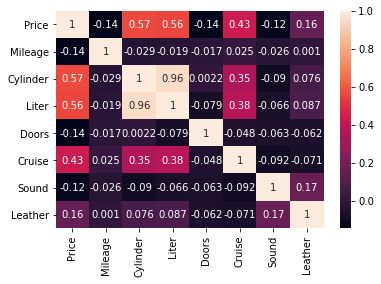

In [10]:
sns.heatmap(df.corr(),annot=True);

In [11]:
x=df[["Mileage","Cylinder","Liter","Cruise"]]

In [12]:
x.head()

,Mileage,Cylinder,Liter,Cruise
0,8221,6,3.1,1
1,9135,6,3.1,1
2,13196,6,3.1,1
3,16342,6,3.1,1
4,19832,6,3.1,1


In [13]:
x.shape

(804, 4)

In [14]:
y=df[["Price"]]

In [15]:
y.shape

(804, 1)

In [16]:
y.head()

,Price
0,17314.103129
1,17542.036083
2,16218.847862
3,16336.913140
4,16339.170324


In [17]:
y.sample(5)

,Price
498,18063.004911
63,22661.048485
176,11215.018647
603,16551.219566
322,15084.815404


In [18]:
from sklearn.linear_model import LinearRegression # Science Kit Learn
from sklearn.model_selection import train_test_split

In [19]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)#train_size=0.8
print("Values in x_train ",x_train)
print("Values in y_train",y_train)

Values in x_train       Mileage  Cylinder  Liter  Cruise
344    20000         8    6.0       1
350     7054         8    6.0       1
443    15903         6    3.5       0
331     6709         4    2.2       1
290    13776         4    2.2       0
..       ...       ...    ...     ...
71      9795         6    3.8       1
106    24415         8    4.6       1
270     4922         4    2.2       0
435    18721         6    3.5       0
102    16041         8    4.6       1

[643 rows x 4 columns]
Values in y_train             Price
344  41371.379273
350  39875.854255
443  17162.478255
331  14696.028990
290  14023.938547
..            ...
71   26060.335350
106  35866.582709
270  14061.122765
435  17173.942322
102  39307.009165

[643 rows x 1 columns]


In [20]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((643, 4), (161, 4), (643, 1), (161, 1))

In [21]:
lr=LinearRegression()
regmodel=lr.fit(x_train,y_train)



In [22]:
y_pretest=lr.predict(x_test)
y_pretest

array([[13513.93463699],
       [17995.62957671],
       [11338.59911746],
       [27038.06391337],
       [25524.10607907],
       [10129.67870162],
       [16908.20754353],
       [11920.37021182],
       [16741.59609947],
       [19485.19693216],
       [24835.23419991],
       [18618.92882257],
       [17972.74064058],
       [26131.39673309],
       [18859.48596532],
       [25364.50207382],
       [19348.49917916],
       [32066.68199055],
       [18099.69937449],
       [22064.23026295],
       [23009.2491516 ],
       [24743.33245833],
       [23830.86775137],
       [11977.72477584],
       [23784.83497172],
       [26060.91838977],
       [27760.69106472],
       [23486.35908373],
       [12144.58230566],
       [24404.06595777],
       [17791.84033157],
       [21219.62519046],
       [19937.67983966],
       [20504.70733911],
       [26926.40413397],
       [26091.97102874],
       [11304.74321564],
       [25639.7158454 ],
       [25348.31130265],
       [12617.74225088],


In [23]:
from sklearn.metrics import mean_squared_error,r2_score


In [24]:
(mean_squared_error(y_test,y_pretest))**0.5

7413.255792158801

In [25]:
r2_score(y_test,y_pretest)

0.30711149069980015

In [26]:
x,y=df[["Mileage","Cylinder","Cruise","Make","Trim"]],df[["Price"]]

In [27]:
x.head()

,Mileage,Cylinder,Cruise,Make,Trim
0,8221,6,1,Buick,Sedan 4D
1,9135,6,1,Buick,Sedan 4D
2,13196,6,1,Buick,Sedan 4D
3,16342,6,1,Buick,Sedan 4D
4,19832,6,1,Buick,Sedan 4D


In [28]:
x=pd.get_dummies(x,drop_first=True)#kukla değişken

In [29]:
x.head()

,Mileage,Cylinder,Cruise,Make_Cadillac,Make_Chevrolet,Make_Pontiac,Make_SAAB,Make_Saturn,Trim_Aero Conv 2D,Trim_Aero Sedan 4D,...,Trim_Quad Coupe 2D,Trim_SE Sedan 4D,Trim_SLE Sedan 4D,Trim_SS Coupe 2D,Trim_SS Sedan 4D,Trim_SVM Hatchback 4D,Trim_SVM Sedan 4D,Trim_Sedan 4D,Trim_Special Ed Ultra 4D,Trim_Sportwagon 4D
0,8221,6,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,9135,6,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,13196,6,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,16342,6,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,19832,6,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [30]:
x.sample(5)

,Mileage,Cylinder,Cruise,Make_Cadillac,Make_Chevrolet,Make_Pontiac,Make_SAAB,Make_Saturn,Trim_Aero Conv 2D,Trim_Aero Sedan 4D,...,Trim_Quad Coupe 2D,Trim_SE Sedan 4D,Trim_SLE Sedan 4D,Trim_SS Coupe 2D,Trim_SS Sedan 4D,Trim_SVM Hatchback 4D,Trim_SVM Sedan 4D,Trim_Sedan 4D,Trim_Special Ed Ultra 4D,Trim_Sportwagon 4D
765,2392,4,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
409,32535,6,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
438,22841,6,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
56,24323,6,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
661,10014,4,1,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [31]:
x.describe()

,Mileage,Cylinder,Cruise,Make_Cadillac,Make_Chevrolet,Make_Pontiac,Make_SAAB,Make_Saturn,Trim_Aero Conv 2D,Trim_Aero Sedan 4D,...,Trim_Quad Coupe 2D,Trim_SE Sedan 4D,Trim_SLE Sedan 4D,Trim_SS Coupe 2D,Trim_SS Sedan 4D,Trim_SVM Hatchback 4D,Trim_SVM Sedan 4D,Trim_Sedan 4D,Trim_Special Ed Ultra 4D,Trim_Sportwagon 4D
count,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,...,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000
mean,19831.934080,5.268657,0.752488,0.099502,0.398010,0.186567,0.141791,0.074627,0.012438,0.024876,...,0.024876,0.024876,0.012438,0.012438,0.012438,0.012438,0.012438,0.211443,0.012438,0.012438
std,8196.319707,1.387531,0.431836,0.299522,0.489792,0.389806,0.349053,0.262952,0.110898,0.155843,...,0.155843,0.155843,0.110898,0.110898,0.110898,0.110898,0.110898,0.408586,0.110898,0.110898
min,266.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,14623.500000,4.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,20913.500000,6.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,25213.000000,6.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,50387.000000,8.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [32]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=13)#train_size=0.8

In [33]:
LR=LinearRegression()
LR.fit(x_train,y_train)

LinearRegression()

In [34]:
y_pretest=LR.predict(x_test)
y_pretest

array([[13558.05572679],
       [20804.90573239],
       [16260.39061283],
       [11202.40561357],
       [16915.23646332],
       [28882.41936598],
       [17780.83278566],
       [33481.25536638],
       [62738.03312135],
       [11447.83212168],
       [17541.84017053],
       [14136.15852087],
       [11141.60721064],
       [22902.5004862 ],
       [18570.16974192],
       [19301.79669107],
       [13285.16903258],
       [32626.31777692],
       [19358.72972264],
       [37896.44076888],
       [13065.26121786],
       [30125.48208054],
       [28925.14278566],
       [63845.39997771],
       [20126.83290045],
       [17544.57566239],
       [ 9803.51337907],
       [10745.57679762],
       [18919.45474455],
       [13763.6777446 ],
       [12331.46980392],
       [22349.98829725],
       [33227.60519464],
       [19011.76156563],
       [20630.67679774],
       [15311.02284533],
       [31592.7029411 ],
       [60286.56711708],
       [39114.74358229],
       [11073.02201494],


In [35]:
(mean_squared_error(y_test,y_pretest))**0.5

2373.5897649652993

In [36]:
r2_score(y_test,y_pretest)

0.9563845906257771

In [37]:
print(LR.coef_)

[[-1.82522970e-01  3.60369189e+03  1.36976344e+02  1.36227778e+04
  -4.59935114e+02 -1.63530323e+03  1.08605929e+04  9.78701986e+02
   3.26016243e+03 -2.11995910e+03  3.97590529e+02  6.83104070e+03
   4.70959320e+02  1.66582293e+03 -5.25745707e+03 -4.04330128e+03
  -2.53833509e+03  9.40087369e+03 -2.31355180e+03 -6.76413189e+03
  -8.74699346e+03 -7.75605030e+03 -8.33174953e+03 -4.86380766e+03
  -2.19009076e+02 -3.25713569e+03 -7.85429560e+03  1.83721465e+04
  -1.02676709e+04 -5.20931028e+03 -6.14131057e+03 -7.39206203e+03
  -5.49175278e+03 -4.81391744e+03 -4.16007659e+03 -4.22624653e+03
  -5.64953278e+03 -7.09194803e+03 -5.42590108e+03 -3.81362083e+03
   3.93071318e+03 -3.02167375e+03 -5.54063331e+02 -7.84127689e+03
  -4.25523706e+03 -3.71238649e+03 -3.06595364e+03 -2.90883608e+03
  -1.06821480e+03 -7.93590823e+03 -7.69747670e+03 -5.89782196e+03
  -4.83532795e+02 -1.27060129e+03]]


## LINEAR REGRESSION

## RIDGE AND LASSO

In [38]:
from sklearn.linear_model import Ridge,Lasso

In [39]:
R=Ridge()
R.fit(x_train,y_train)
y_pred_ridge=R.predict(x_test)

In [40]:
y_pred_ridge

array([[13340.30245749],
       [20867.35428463],
       [16737.49466231],
       [11428.87766046],
       [17036.78902086],
       [28316.45489874],
       [18265.32009095],
       [33535.17204601],
       [60027.23663367],
       [11174.3217953 ],
       [17981.00922262],
       [14285.67013982],
       [11280.63227962],
       [23077.19156308],
       [18526.70679835],
       [19790.75962963],
       [13314.63322301],
       [32677.71869197],
       [20126.13467564],
       [38396.65077878],
       [12954.49834661],
       [29923.04258729],
       [28881.59068683],
       [61137.86206044],
       [20187.28613555],
       [17667.98013204],
       [10342.99441682],
       [10627.98795454],
       [18870.51707162],
       [13896.79669799],
       [12443.92649423],
       [22085.76413373],
       [32800.36316233],
       [18979.54332321],
       [20664.990115  ],
       [15487.24967826],
       [31034.71383429],
       [57568.55687319],
       [38972.71277011],
       [11236.77798154],


In [41]:
(mean_squared_error(y_test,y_pred_ridge))**0.5

2292.0933094282764

In [42]:
r2_score(y_test,y_pred_ridge)

0.9593282163378927

# LASSO REGRESSION 

In [43]:
L=Lasso()
L.fit(x_train,y_train)
y_pred_lasso=L.predict(x_test)

In [44]:
y_pred_lasso

array([13471.36779434, 20894.04186228, 16362.37811177, 11297.11327457,
       16964.70579289, 28372.41653345, 17895.03092036, 33569.74290839,
       62641.81560805, 11377.94738658, 17624.64081795, 14219.46587843,
       11224.21132675, 22979.07720462, 18444.14384911, 19412.3232591 ,
       13342.4568992 , 32716.86911568, 19275.16281693, 37987.22931357,
       13074.50272563, 30045.02343885, 28900.91741738, 63746.50931009,
       20217.60588023, 17592.52578376,  9925.1312077 , 10760.41796227,
       18814.31376187, 13921.68303691, 12451.65274449, 22262.28739756,
       33145.83405315, 18947.67742059, 20712.33794354, 15438.03001325,
       31076.15755564, 60196.26737793, 39012.73044307, 11210.25960484,
       26242.85492834, 18401.13962976, 11349.26581471, 26269.00981614,
       16855.89365627, 27448.68834023, 17843.61814245, 11359.73915019,
       13073.28546813, 19233.47089681, 39439.89566888, 20044.46254786,
       12566.5810584 , 13728.63997486, 18828.15061345, 11360.61555493,
      

In [45]:
(mean_squared_error(y_test,y_pred_lasso))**0.5

2425.734741712505

In [46]:
r2_score(y_test,y_pred_lasso)

0.9544471820141907

In [47]:
from sklearn.linear_model import ElasticNet

In [48]:
E=ElasticNet(l1_ratio=.8)

In [49]:
E.fit(x_train,y_train)

ElasticNet(l1_ratio=0.8)

In [50]:
E_pred_elastic=E.predict(x_test)

In [51]:
E_pred_elastic

array([12209.20515957, 22948.82450252, 19637.38269364, 13093.57230711,
       20305.30759577, 27766.3828503 , 20789.62799706, 28241.39750412,
       34446.72211066, 13349.87306594, 23521.54408279, 16964.82747387,
       13962.84838432, 26430.1505673 , 20878.25530252, 22373.6829386 ,
       13987.17175468, 27350.99628653, 24275.43304409, 34604.73099031,
       16347.74492831, 22930.18795051, 23221.97851139, 35600.02360235,
       22242.62456159, 20960.75238617, 13698.80994858, 13931.8377818 ,
       20991.56985942, 15372.57719912, 13578.19466749, 20723.10466831,
       23934.14519133, 21390.4708927 , 22563.9428629 , 16542.93761417,
       30589.09157786, 31893.56695409, 33153.59865814, 12129.14045979,
       22763.77192066, 21138.47589061, 13657.56171541, 24906.12746783,
       19196.23762531, 27757.36774199, 21183.79898421, 13330.86364627,
       14500.3232003 , 21702.31364544, 33599.55964372, 22400.9166997 ,
       14590.80798234, 15700.17187327, 23808.75179106, 12564.22068758,
      

In [52]:
(mean_squared_error(y_test,E_pred_elastic))**0.5

6136.575838262781

In [53]:
r2_score(y_test,E_pred_elastic)

0.7084716172183272

In [55]:
##EXTRA TREE REGRESSOR
from sklearn.tree import ExtraTreeRegressor
ETR=ExtraTreeRegressor()
ETR.fit(x_train,y_train)
y_pred_etr=ETR.predict(x_test)

In [58]:
(mean_squared_error(y_test,y_pred_etr))**0.5

2248.0558244069903

In [59]:
r2_score(y_test,y_pred_etr)

0.9608760392069468

In [60]:
import warnings
warnings.filterwarnings("ignore")

In [64]:
from sklearn.ensemble import GradientBoostingRegressor
GBR=GradientBoostingRegressor()

In [65]:
GBR.fit(x_train,y_train)
y_pred_gbr=GBR.predict(x_test)

In [67]:
(mean_squared_error(y_test,y_pred_gbr))**0.5

1782.0260829850045

In [68]:
r2_score(y_test,y_pred_gbr)

0.9754157623967905

In [74]:
#K-NEIGHBORS
from sklearn.neighbors import KNeighborsRegressor
KNR=KNeighborsRegressor(n_neighbors=10,weights="uniform")

In [78]:
Model=KNR.fit(x_train,y_train)
y_pred_knr=Model.predict(x_test)

In [79]:
(mean_squared_error(y_test,y_pred_knr))**0.5

12357.205535102306

In [80]:
r2_score(y_test,y_pred_knr)

-0.18214070680081607